In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np
from sklearn.cluster import KMeans

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 55)

In [4]:
cd ../scripts/

/home/jds98/10 Academy/Week 1/Week-1-Project/scripts


In [5]:
import dataset_infos
import clean_transform as transf
import eda_functions as eda
import prerequisites as pre

In [6]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


## Load the data

In [7]:
df = pre.load_data()

In [8]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

## Clean the data

In [9]:
df = pre.clean_data(df)

In [10]:
pre.data_infos(df)

 There are 149010 rows and 45 columns
The dataset contains 0.0 % missing values.


We’re going to track the user’s engagement using the following engagement metrics: 
 - sessions frequency 
 - the duration of the session 
 - the sessions total traffic (download and upload (bytes))


## Aggregation of the above metrics per customer id (MSISDN)

In [11]:
col = 'MSISDN/Number'
use = ['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)','Total UL (Bytes)']
methods = ['count', 'sum', 'sum', 'sum']
df_metrics = transf.aggregate(df, col, use, methods)

In [12]:
df_metrics.rename(columns = {'Bearer Id':'sessions frequency'}, inplace = True)
df_metrics

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00"
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00"
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00"
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00"
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00"
...,...,...,...,...,...
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00"
106468,"41,906,541,782.21",504,"35,399,200.00","232,876,890,010.00","21,175,512,458.00"
106469,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00"
106470,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00"


In [13]:
df_metrics = df_metrics.drop(labels=106468, axis=0)

In [14]:
df_metrics['Total traffic'] = df_metrics['Total DL (Bytes)'] + df['Total UL (Bytes)']
df_metrics

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","879,387,207.00"
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","174,555,575.00"
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","584,543,301.00"
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","445,317,390.00"
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","1,401,673,231.00"
...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","729,399,923.00"
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","490,198,637.00"
106469,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","242,579,156.00"
106470,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00","582,791,270.00"


## Top 10 customers per engagement metric 

In [15]:
metrics_count_dict = {}
cols = ['sessions frequency', 'Dur. (ms)', 'Total traffic']
for col in cols:
    metrics_count_dict[f'{col}_top'] = df_metrics[['MSISDN/Number', col]].sort_values(by=[col], ascending=False)

In [16]:
top_cust_sessions_freq = list((metrics_count_dict['sessions frequency_top'][:10]).index)
top_cust_sessions_freq

[13467, 6404, 13123, 36909, 92584, 76077, 64883, 1270, 92239, 658]

In [17]:
top_cust_duration = list((metrics_count_dict['Dur. (ms)_top'][:10]).index)
top_cust_duration

[13123, 6404, 92584, 13467, 64883, 50096, 56951, 658, 65787, 92239]

In [18]:
top_cust_total_traffic = list((metrics_count_dict['Total traffic_top'][:10]).index)
top_cust_total_traffic

[6404, 92584, 13123, 76077, 13467, 36909, 62804, 92239, 57032, 86138]

In [19]:
df_metrics_top = pd.DataFrame(columns=['top_cust_sessions_freq', 'top_cust_duration', 'top_cust_Total traffic'])
df_metrics_top['top_cust_sessions_freq'] = top_cust_sessions_freq
df_metrics_top['top_cust_duration'] = top_cust_duration
df_metrics_top['top_cust_Total traffic'] = top_cust_total_traffic
df_metrics_top

,top_cust_sessions_freq,top_cust_duration,top_cust_Total traffic
0,13467,13123,6404
1,6404,6404,92584
2,13123,92584,13123
3,36909,13467,76077
4,92584,64883,13467
5,76077,50096,36909
6,64883,56951,62804
7,1270,658,92239
8,92239,65787,57032
9,658,92239,86138


## Normalization each engagement metric

In [20]:
df_metrics

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","879,387,207.00"
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","174,555,575.00"
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","584,543,301.00"
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","445,317,390.00"
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","1,401,673,231.00"
...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","729,399,923.00"
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","490,198,637.00"
106469,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","242,579,156.00"
106470,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00","582,791,270.00"


In [21]:
df_metrics_norm = transf.normalize(df_metrics.drop(['MSISDN/Number'], axis=1))
df_metrics_norm

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic
0,-0.49,-0.16,0.45,-0.60,0.44
1,-0.49,0.19,-1.10,-0.60,-1.08
2,-0.49,-0.06,-0.17,-0.51,-0.20
3,-0.49,-0.52,-0.50,-1.04,-0.49
4,0.75,-0.59,1.57,1.03,1.56
...,...,...,...,...,...
106466,-0.49,-0.74,0.12,-0.86,0.12
106467,-0.49,-0.03,-0.41,-0.61,-0.40
106469,-0.49,3.92,-0.94,-0.56,-0.93
106470,-0.49,0.57,-0.20,-0.02,-0.20


### k-means (k=3) to classify customers in three groups of engagement. 

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_metrics_norm.drop(['Total traffic'], axis=1))

KMeans(max_iter=50, n_clusters=3)

In [23]:
df_metrics_norm.loc[:,'MSISDN/Number'] = df_metrics['MSISDN/Number']
df_metrics_norm

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic,MSISDN/Number
0,-0.49,-0.16,0.45,-0.60,0.44,"33,601,001,722.00"
1,-0.49,0.19,-1.10,-0.60,-1.08,"33,601,001,754.00"
2,-0.49,-0.06,-0.17,-0.51,-0.20,"33,601,002,511.00"
3,-0.49,-0.52,-0.50,-1.04,-0.49,"33,601,007,832.00"
4,0.75,-0.59,1.57,1.03,1.56,"33,601,008,617.00"
...,...,...,...,...,...,...
106466,-0.49,-0.74,0.12,-0.86,0.12,"33,789,996,170.00"
106467,-0.49,-0.03,-0.41,-0.61,-0.40,"33,789,997,247.00"
106469,-0.49,3.92,-0.94,-0.56,-0.93,"3,197,020,876,596.00"
106470,-0.49,0.57,-0.20,-0.02,-0.20,"337,000,037,000,919.00"


In [24]:
#Appending the resultant clustering labels in the last column, the view of the data frame.
df_metrics_norm['cluster'] = kmeans.labels_
df_metrics_norm

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic,MSISDN/Number,cluster
0,-0.49,-0.16,0.45,-0.60,0.44,"33,601,001,722.00",0
1,-0.49,0.19,-1.10,-0.60,-1.08,"33,601,001,754.00",0
2,-0.49,-0.06,-0.17,-0.51,-0.20,"33,601,002,511.00",0
3,-0.49,-0.52,-0.50,-1.04,-0.49,"33,601,007,832.00",0
4,0.75,-0.59,1.57,1.03,1.56,"33,601,008,617.00",2
...,...,...,...,...,...,...,...
106466,-0.49,-0.74,0.12,-0.86,0.12,"33,789,996,170.00",0
106467,-0.49,-0.03,-0.41,-0.61,-0.40,"33,789,997,247.00",0
106469,-0.49,3.92,-0.94,-0.56,-0.93,"3,197,020,876,596.00",0
106470,-0.49,0.57,-0.20,-0.02,-0.20,"337,000,037,000,919.00",0


In [25]:
df_metrics['cluster'] = df_metrics_norm['cluster']
df_metrics

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic,cluster
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","879,387,207.00",0
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","174,555,575.00",0
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","584,543,301.00",0
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","445,317,390.00",0
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","1,401,673,231.00",2
...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","729,399,923.00",0
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","490,198,637.00",0
106469,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","242,579,156.00",0
106470,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00","582,791,270.00",0


### Minimum, maximum, average & total non- normalized metrics for each cluster.

In [26]:
ag = 'cluster'
usec = ['sessions frequency', 'Dur. (ms)', 'Total traffic']
methodsc = [['min', 'max', 'mean', 'sum'], ['min', 'max', 'mean', 'sum'], ['min', 'max', 'mean', 'sum']]
df_metrics_clusters = transf.aggregate(df_metrics, ag, usec, methodsc)

In [27]:
cluster_metric_sess_freq = df_metrics_clusters['sessions frequency']
cluster_metric_Dur = df_metrics_clusters['Dur. (ms)']
cluster_metric_Total_traffic = df_metrics_clusters['Total traffic']

In [28]:
cluster_metric_sess_freq

,min,max,mean,sum
0,1,2,1.01,79045
1,2,18,4.40,16274
2,1,4,2.16,53187


In [29]:
cluster_metric_Dur

,min,max,mean,sum
0,"7,142.00","1,042,254.00","103,607.02","8,101,136,268.00"
1,"66,594.00","18,553,754.00","635,625.36","2,348,635,693.00"
2,"18,235.00","1,573,420.00","209,714.90","5,155,840,707.00"


In [30]:
cluster_metric_Total_traffic

,min,max,mean,sum
0,"31,567,459.00","986,163,818.00","495,938,895.20","38,453,118,178,287.00"
1,"427,164,655.00","8,199,272,448.00","2,113,491,975.87","7,762,856,027,380.00"
2,"100,378,130.00","2,465,079,900.00","1,029,677,341.62","25,110,741,330,047.00"


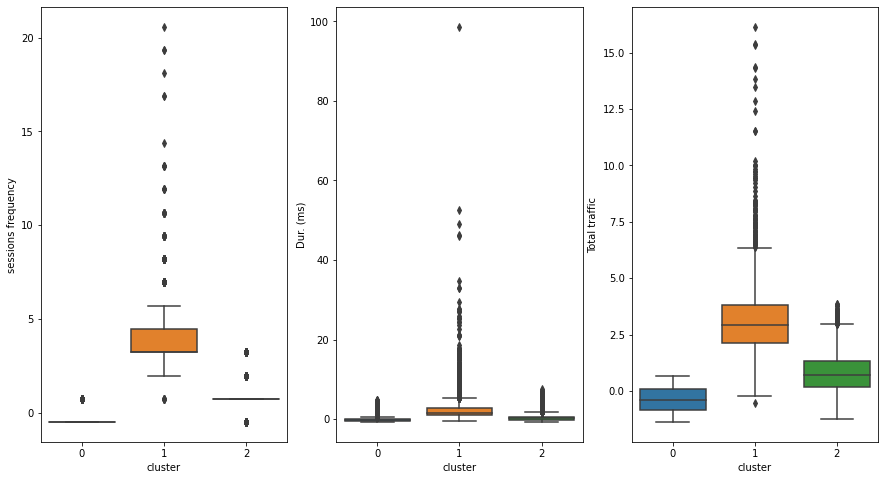

In [31]:
metrs = ['sessions frequency', 'Dur. (ms)', 'Total traffic']
plt.figure(figsize=(15, 8))
for i in range(len(metrs)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=metrs[i], data=df_metrics_norm)
plt.savefig('metrics_clusters.png')

### Aggregation of user total traffic per application 

In [32]:
col = 'MSISDN/Number'
use_app = ['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)']
methods_app = ['sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum', 'sum']
df_metrics_app = transf.aggregate(df, col, use_app, methods_app)

In [33]:
df_metrics_app['Social Media Total (Bytes)'] = df_metrics_app['Social Media DL (Bytes)'] + df_metrics_app['Social Media UL (Bytes)']
df_metrics_app['Google Total (Bytes)'] = df_metrics_app['Google DL (Bytes)'] + df_metrics_app['Google UL (Bytes)']
df_metrics_app['Email Total (Bytes)'] = df_metrics_app['Email DL (Bytes)'] + df_metrics_app['Email UL (Bytes)']
df_metrics_app['Youtube Total (Bytes)'] = df_metrics_app['Youtube DL (Bytes)'] + df_metrics_app['Youtube UL (Bytes)']
df_metrics_app['Netflix Total (Bytes)'] = df_metrics_app['Netflix DL (Bytes)'] + df_metrics_app['Netflix UL (Bytes)']
df_metrics_app['Gaming Total (Bytes)'] = df_metrics_app['Gaming DL (Bytes)'] + df_metrics_app['Gaming UL (Bytes)']
df_metrics_app['Other Total (Bytes)'] = df_metrics_app['Other DL (Bytes)'] + df_metrics_app['Other UL (Bytes)']

df_metrics_app = df_metrics_app.drop(['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'], axis=1)

In [34]:
df_metrics_app

,MSISDN/Number,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,"33,601,001,722.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
1,"33,601,001,754.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
2,"33,601,002,511.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
3,"33,601,007,832.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"
4,"33,601,008,617.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00"
...,...,...,...,...,...,...,...,...
106467,"33,789,997,247.00","498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00"
106468,"41,906,541,782.21","932,422,807.00","3,925,359,354.00","1,116,800,390.00","11,447,654,394.00","11,332,644,210.00","221,065,748,503.00","215,011,972,057.00"
106469,"3,197,020,876,596.00","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00"
106470,"337,000,037,000,919.00","521,566.00","9,830,617.00","3,318,582.00","36,734,940.00","30,905,042.00","510,142,695.00","149,188,439.00"


In [35]:
df_metrics_app.columns

Index(['MSISDN/Number', 'Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)'],
      dtype='object')

### Top 10 most engaged users per application

In [36]:
top10_app_dict = {}
cols_app = ['Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)']
for col in cols_app:
    top10_app_dict[f'{col}_top'] = df_metrics_app[['MSISDN/Number', col]].sort_values(by=[col], ascending=False)

In [37]:
top10_cust_Social_media = list((top10_app_dict['Social Media Total (Bytes)_top'][:10]).index)
top10_cust_Google = list((top10_app_dict['Google Total (Bytes)_top'][:10]).index)
top10_cust_Email = list((top10_app_dict['Email Total (Bytes)_top'][:10]).index)
top10_cust_Youtube = list((top10_app_dict['Youtube Total (Bytes)_top'][:10]).index)
top10_cust_Netflix = list((top10_app_dict['Netflix Total (Bytes)_top'][:10]).index)
top10_cust_Gaming = list((top10_app_dict['Gaming Total (Bytes)_top'][:10]).index)
top10_cust_Other = list((top10_app_dict['Other Total (Bytes)_top'][:10]).index)

top10_cust_app = pd.DataFrame(columns=['top10_cust_Social_media', 'top10_cust_Google', 'top10_cust_Email', 'top10_cust_Youtube', 'top10_cust_Netflix', 'top10_cust_Gaming', 'top10_cust_Other'])

top10_cust_app['top10_cust_Social_media'] = top10_cust_Social_media
top10_cust_app['top10_cust_Google'] = top10_cust_Google
top10_cust_app['top10_cust_Email'] = top10_cust_Email 
top10_cust_app['top10_cust_Youtube'] = top10_cust_Youtube
top10_cust_app['top10_cust_Netflix'] = top10_cust_Netflix
top10_cust_app['top10_cust_Gaming'] = top10_cust_Gaming
top10_cust_app['top10_cust_Other'] = top10_cust_Other

top10_cust_app

,top10_cust_Social_media,top10_cust_Google,top10_cust_Email,top10_cust_Youtube,top10_cust_Netflix,top10_cust_Gaming,top10_cust_Other
0,106468,106468,106468,106468,106468,106468,106468
1,13467,13467,13467,13123,36909,6404,13467
2,92584,13123,6404,92584,6404,92584,6404
3,36909,6404,13123,6404,13123,13123,76077
4,6404,92584,105756,13467,92584,76077,13123
5,13123,36909,36909,76077,13467,13467,658
6,64883,105756,92584,64883,92239,36909,36909
7,105756,76077,76077,13934,64883,62804,13877
8,70705,64883,59872,92239,76077,92239,13934
9,658,94308,64883,86138,105756,57032,94308


## Plot of the top 3 most used applications

In [38]:
Social_media = df_metrics_app['Social Media Total (Bytes)'].sum()
Google = df_metrics_app['Google Total (Bytes)'].sum()
Email = df_metrics_app['Email Total (Bytes)'].sum()
Youtube = df_metrics_app['Youtube Total (Bytes)'].sum()
Netflix = df_metrics_app['Netflix Total (Bytes)'].sum()
Gaming = df_metrics_app['Gaming Total (Bytes)'].sum()
Other = df_metrics_app['Other Total (Bytes)'].sum()

Total = Social_media + Google + Email + Youtube + Netflix + Gaming + Other

In [39]:
Social_media = round((Social_media / Total) * 100, 2)
Google = round((Google / Total) * 100, 2)
Email = round((Email / Total) * 100, 2)
Youtube = round((Youtube / Total) * 100, 2)
Netflix = round((Netflix / Total) * 100, 2)
Gaming = round((Gaming / Total) * 100, 2)
Other = round((Other / Total) * 100, 2)

In [40]:
app_freq = pd.DataFrame(columns=['App', 'Freq'])
app_freq['App'] = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
app_freq['Freq'] = [Social_media, Google, Email, Youtube, Netflix, Gaming, Other]
app_freq

,App,Freq
0,Social Media,0.20
1,Google,0.85
2,Email,0.25
3,Youtube,2.47
4,Netflix,2.47
5,Gaming,46.94
6,Other,46.83


In [41]:
app_freq_plot = pd.DataFrame(columns=['App', 'Freq'])
app_freq_plot['App'] = ['Social Media', 'Google', 'Email', 'Youtube/Netflix', 'Gaming', 'Other']
app_freq_plot['Freq'] = [Social_media, Google, Email, Youtube, Gaming, Other]
app_freq_plot = app_freq_plot.sort_values(by=['Freq'], ascending=False)
app_freq_plot

,App,Freq
4,Gaming,46.94
5,Other,46.83
3,Youtube/Netflix,2.47
1,Google,0.85
2,Email,0.25
0,Social Media,0.20


In [42]:
data = app_freq_plot.drop(labels=[0,1,2], axis=0)
data = data.groupby('App')['Freq'].sum()
data

App
Gaming            46.94
Other             46.83
Youtube/Netflix    2.47
Name: Freq, dtype: float64

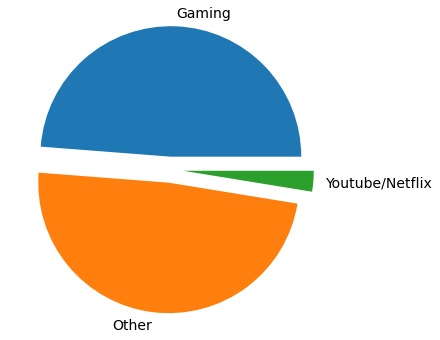

In [43]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
explode = (0.1, 0.1, 0.1)
plt.pie(x=data, explode=explode, labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
# plt.title("Delivery Tips by type", fontsize=14);
plt.savefig('Top3 applications.png')

### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
 - Finding optimized value of k using elbow method  

### Normalization

In [44]:
df_metrics_app

,MSISDN/Number,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,"33,601,001,722.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
1,"33,601,001,754.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
2,"33,601,002,511.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
3,"33,601,007,832.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"
4,"33,601,008,617.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00"
...,...,...,...,...,...,...,...,...
106467,"33,789,997,247.00","498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00"
106468,"41,906,541,782.21","932,422,807.00","3,925,359,354.00","1,116,800,390.00","11,447,654,394.00","11,332,644,210.00","221,065,748,503.00","215,011,972,057.00"
106469,"3,197,020,876,596.00","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00"
106470,"337,000,037,000,919.00","521,566.00","9,830,617.00","3,318,582.00","36,734,940.00","30,905,042.00","510,142,695.00","149,188,439.00"


In [45]:
df_metrics_app_norm = transf.normalize(df_metrics_app.drop(['MSISDN/Number'], axis=1))
df_metrics_app_norm

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,-0.10,-0.46,-0.45,-0.25,-0.11,0.26,-0.27
1,0.03,-0.39,0.04,-0.47,-0.50,-0.59,-0.40
2,0.19,-0.53,0.01,-0.25,-0.30,-0.08,-0.12
3,-0.66,-0.09,-0.22,-0.60,-0.73,-0.26,-0.71
4,0.10,0.53,0.04,0.24,0.43,0.88,0.26
...,...,...,...,...,...,...,...
106467,-0.60,-0.39,-0.16,-0.29,-0.57,-0.20,-0.49
106468,271.06,276.14,273.36,278.66,277.91,271.66,269.36
106469,-0.54,-0.03,-0.40,-0.48,-0.12,-0.52,-0.16
106470,-0.59,-0.08,0.04,0.12,-0.02,-0.11,-0.57


### k-means: finding optimized value of k: elbow method 

In [46]:
### k-means (k=3) to classify customers in three groups of engagement. 
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_metrics_app_norm)

    ssd.append(kmeans.inertia_)


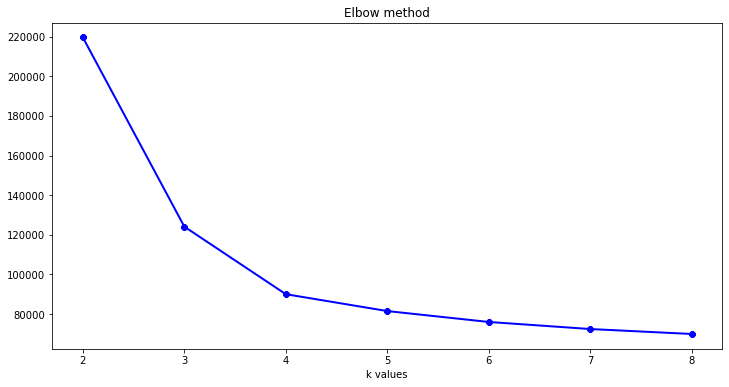

In [47]:
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters, ssd, linewidth = 2, color = "blue", marker = "8")
plt.xlabel('k values')
plt.ylabel("")
plt.title('Elbow method')
plt.savefig('Elbow method.png')

### The graph takes of at k = 4. Then k = 4 is the optimized value.

## k-means (k=4) to classify customers


In [48]:
kmeans_app = KMeans(n_clusters=4, max_iter=50)
kmeans_app.fit(df_metrics_app_norm)

KMeans(max_iter=50, n_clusters=4)

In [49]:
df_metrics_app_norm.loc[:,'MSISDN/Number'] = df_metrics_app['MSISDN/Number']
df_metrics_app_norm

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),MSISDN/Number
0,-0.10,-0.46,-0.45,-0.25,-0.11,0.26,-0.27,"33,601,001,722.00"
1,0.03,-0.39,0.04,-0.47,-0.50,-0.59,-0.40,"33,601,001,754.00"
2,0.19,-0.53,0.01,-0.25,-0.30,-0.08,-0.12,"33,601,002,511.00"
3,-0.66,-0.09,-0.22,-0.60,-0.73,-0.26,-0.71,"33,601,007,832.00"
4,0.10,0.53,0.04,0.24,0.43,0.88,0.26,"33,601,008,617.00"
...,...,...,...,...,...,...,...,...
106467,-0.60,-0.39,-0.16,-0.29,-0.57,-0.20,-0.49,"33,789,997,247.00"
106468,271.06,276.14,273.36,278.66,277.91,271.66,269.36,"41,906,541,782.21"
106469,-0.54,-0.03,-0.40,-0.48,-0.12,-0.52,-0.16,"3,197,020,876,596.00"
106470,-0.59,-0.08,0.04,0.12,-0.02,-0.11,-0.57,"337,000,037,000,919.00"


In [50]:
#Appending the resultant clustering labels in the last column, the view of the data frame.
df_metrics_app_norm['cluster'] = kmeans_app.labels_
df_metrics_app_norm

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),MSISDN/Number,cluster
0,-0.10,-0.46,-0.45,-0.25,-0.11,0.26,-0.27,"33,601,001,722.00",3
1,0.03,-0.39,0.04,-0.47,-0.50,-0.59,-0.40,"33,601,001,754.00",3
2,0.19,-0.53,0.01,-0.25,-0.30,-0.08,-0.12,"33,601,002,511.00",3
3,-0.66,-0.09,-0.22,-0.60,-0.73,-0.26,-0.71,"33,601,007,832.00",3
4,0.10,0.53,0.04,0.24,0.43,0.88,0.26,"33,601,008,617.00",0
...,...,...,...,...,...,...,...,...,...
106467,-0.60,-0.39,-0.16,-0.29,-0.57,-0.20,-0.49,"33,789,997,247.00",3
106468,271.06,276.14,273.36,278.66,277.91,271.66,269.36,"41,906,541,782.21",1
106469,-0.54,-0.03,-0.40,-0.48,-0.12,-0.52,-0.16,"3,197,020,876,596.00",3
106470,-0.59,-0.08,0.04,0.12,-0.02,-0.11,-0.57,"337,000,037,000,919.00",3


In [51]:
df_metrics_app['cluster'] = df_metrics_app_norm['cluster']
df_metrics_app

,MSISDN/Number,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),cluster
0,"33,601,001,722.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00",3
1,"33,601,001,754.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00",3
2,"33,601,002,511.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00",3
3,"33,601,007,832.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00",3
4,"33,601,008,617.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00",0
...,...,...,...,...,...,...,...,...,...
106467,"33,789,997,247.00","498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00",3
106468,"41,906,541,782.21","932,422,807.00","3,925,359,354.00","1,116,800,390.00","11,447,654,394.00","11,332,644,210.00","221,065,748,503.00","215,011,972,057.00",1
106469,"3,197,020,876,596.00","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00",3
106470,"337,000,037,000,919.00","521,566.00","9,830,617.00","3,318,582.00","36,734,940.00","30,905,042.00","510,142,695.00","149,188,439.00",3


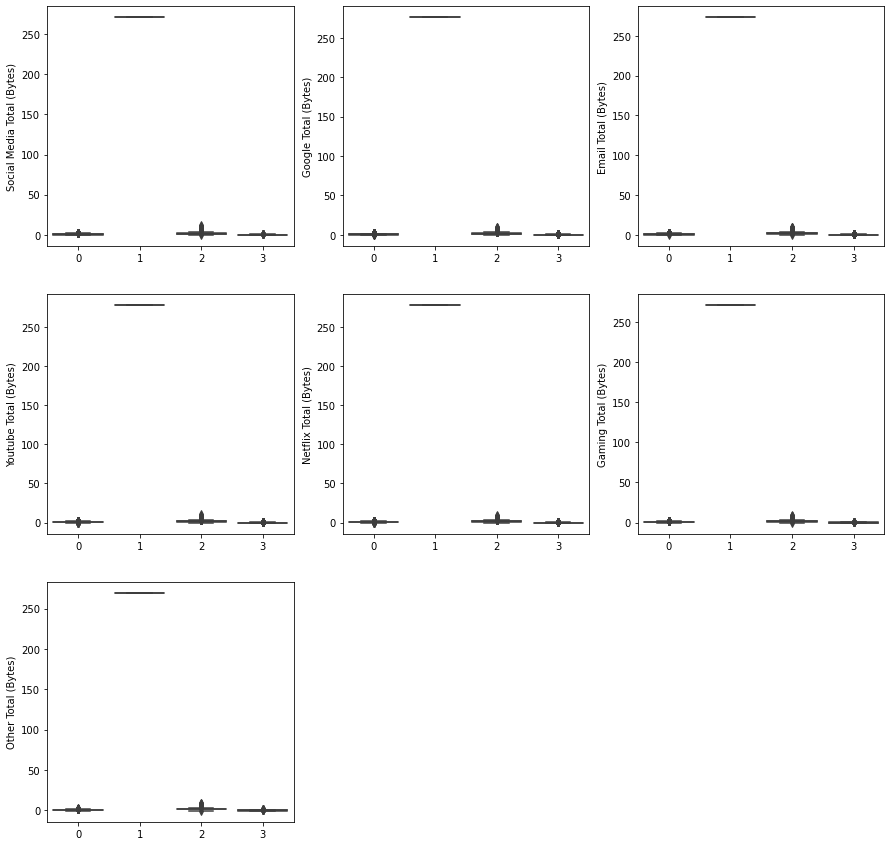

In [52]:
metrs_app = ['Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)']
plt.figure(figsize=(15, 15))
for i in range(len(metrs_app)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='cluster', y=metrs_app[i], data=df_metrics_app_norm)
    plt.xlabel('')
plt.savefig('plot_cluters4.png')

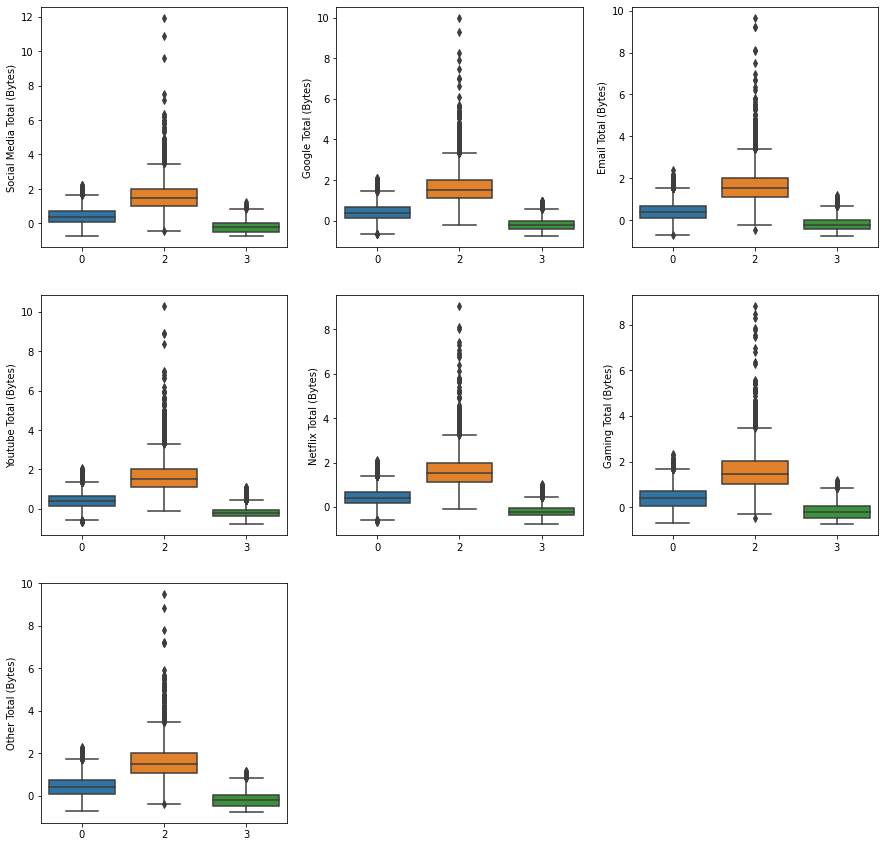

In [53]:
metrs_app = ['Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)']
plt.figure(figsize=(15, 15))
for i in range(len(metrs_app)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='cluster', y=metrs_app[i], data=df_metrics_app_norm.drop(labels=106468, axis=0))
    plt.xlabel('')
plt.savefig('plot remove cluster1.png')